# NERC Enforcement Actions Analysis

An exploratory analysis of NERC fines from 2008 to 2020. The data set can be found at https://www.nerc.com/pa/comp/CE/Pages/Enforcement-and-Mitigation.aspx under the tab "Searchable Spreadsheet"

# Read in the Data

In [101]:
import pandas as pd
import numpy as np
allData = pd.read_csv("all_fines_2008_to_2020.csv", error_bad_lines=False)

In [2]:
allData.head(10)

,Filing Date,Docket Number,Regional Entity,Registered Entity,NCR ID (NERC Compliance Registry Identifier),Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.),NERC Violation ID,Reliability Standard,Req.,"Violation Risk Factor (Lower, Medium, High)","Risk Assessment (Minimal, Moderate, Serious)",Mitigation Completion Date,Notice of No Further Review Issued
0,12/30/2020,NP21-5-000,RF,Michigan Power LP,NCR11409,0,RFC2019021748,VAR-002-4.1,R2,Medium,Moderate,43473,NaN
1,12/30/2020,NP21-5-000,RF,METC,NCR00820,125000,RFC2017017946,FAC-008-1,R1,Lower,Moderate,44561,NaN
2,11/30/2020,NP21-4-000,WECC,Southern California Edison Company,NCR05398,296000,WECC2017018527,FAC-003-3,R2,High,Moderate,43686,X
3,11/30/2020,NP21-4-000,WECC,Southern California Edison Company,NCR05398,296000,WECC2018020303,FAC-003-3,R6,Medium,Moderate,43921,X
4,11/30/2020,NP21-2-000,WECC,"sPower Services, LLC",NCR11679,22000,WECC2017017218,VAR-002-4,R3,Medium,Minimal,42795,X
5,11/30/2020,NP21-2-000,WECC,"sPower Services, LLC",NCR11679,22000,WECC2018019434,VAR-002-4.1,R4,Medium,Minimal,43182,X
6,11/30/2020,NP21-2-000,WECC,"sPower Services, LLC",NCR11679,22000,WECC2018020372,VAR-002-4.1,R5,Medium,Minimal,43440,X
7,11/30/2020,NP21-2-000,WECC,"sPower Services, LLC",NCR11679,22000,WECC2019022519,VAR-002-4.1,R6,Medium,Minimal,43781,X
8,11/30/2020,NP21-2-000,WECC,Sacramento Municipal Utility District (SMUD),NCR05368,26000,WECC2019022212,FAC-008-3,R2,Medium,Moderate,43802,X
9,11/30/2020,NP21-2-000,WECC,Sacramento Municipal Utility District (SMUD),NCR05368,26000,WECC2019022213,FAC-008-3,R3,Medium,Moderate,43802,X


In [3]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 13 columns):
Filing Date                                                                                                                                   7600 non-null object
Docket Number                                                                                                                                 7600 non-null object
Regional Entity                                                                                                                               7600 non-null object
Registered Entity                                                                                                                             7600 non-null object
NCR ID (NERC Compliance Registry Identifier)                                                                                                  7600 non-null object
Total Penalty ($) (The total penalty amount represents an aggregate amount for

Looks like we are dealing with 7,600 entries with some factors having some null entries. Depending on what aspect we are trying to analyze, we can omit the null entries or see if we can extrapolate them

In [5]:
allData.describe()

,Filing Date,Docket Number,Regional Entity,Registered Entity,NCR ID (NERC Compliance Registry Identifier),Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.),NERC Violation ID,Reliability Standard,Req.,"Violation Risk Factor (Lower, Medium, High)","Risk Assessment (Minimal, Moderate, Serious)",Mitigation Completion Date,Notice of No Further Review Issued
count,7600,7600,7600,7600,7600,7600,7600,7572,7572,7507,3389,3388,7553
unique,172,867,21,898,793,243,7435,389,639,38,5,1359,1
top,10/14/2009,NP10-2-000,WECC,Unidentified Registered Entity,NCRXXXXX,0,XXXXXXXXXX,PRC-005-1,R1,Medium,Minimal,Ongoing,X
freq,567,567,2714,3466,3770,1522,152,839,1115,3998,1604,127,7553


In [6]:
allData.isnull().sum()

Filing Date                                                                                                                                      0
Docket Number                                                                                                                                    0
Regional Entity                                                                                                                                  0
Registered Entity                                                                                                                                0
NCR ID (NERC Compliance Registry Identifier)                                                                                                     0
Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.)       0
NERC Violation ID                                                                                                     

In [7]:
allData.isna().sum()

Filing Date                                                                                                                                      0
Docket Number                                                                                                                                    0
Regional Entity                                                                                                                                  0
Registered Entity                                                                                                                                0
NCR ID (NERC Compliance Registry Identifier)                                                                                                     0
Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.)       0
NERC Violation ID                                                                                                     

# Clean Up The Data

In [87]:
allData.columns

Index(['Filing Date', 'Docket Number', 'Regional Entity', 'Registered Entity',
       'NCR ID (NERC Compliance Registry Identifier)',
       'Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.)',
       'NERC Violation ID', 'Reliability Standard', 'Req.',
       'Violation Risk Factor (Lower, Medium, High)',
       'Risk Assessment (Minimal, Moderate, Serious)',
       'Mitigation Completion Date', 'Notice of No Further Review Issued'],
      dtype='object')

In [59]:
def cleanUpCols(data):
    """
    Function is used to clean up the data frame by renaming columns and dropping columns
    @return data: cleaned up data frame
    """
    
    # Columns to drop
    colsToDrop = ['Docket Number','NCR ID (NERC Compliance Registry Identifier)','NERC Violation ID',
       'Mitigation Completion Date', 'Notice of No Further Review Issued']
    data = data.drop(columns = colsToDrop)
            
    # change names of columns
    data.rename(columns = {'Filing Date':'Date',
                           'Regional Entity': 'Regional_Entity', 
                           'Registered Entity': 'Registered_Entity',
                           'Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.)':'Penalty',
                          'Violation Risk Factor (Lower, Medium, High)': 'Risk_Factor',
                           'Risk Assessment (Minimal, Moderate, Serious)': 'Risk_Assessment',
                           'Reliability Standard': 'Reliability_Standard',
                           'Req.': 'Requirement'
                          }, inplace = True)
    return data
    

In [60]:
def extractMonthAndYear(data):
    """
    Function is used to extract the month and year value into their own column
    @param data: the data frame with all the data after running the function cleanUpCols (you need the column 'Date')
    @return nothing
    """
    months = []
    years = []
    for i in range(len(data)):
        date = data["Date"].iloc[i]
        firstSlash = date.index("/")
        month = int(date[:firstSlash])
        year = int(date[-4:])
        months.append(month)
        years.append(year)
    data["Month"] = months
    data["Year"] = years

In [78]:
def cleanUpPenalty(allData):
    """
    Function used to clean up the values in the 'Penalty' column and change the type to integer
    @param allData: pass in the data frame containing all the data with the penalties in a column called 'Penalty'
    @return dontKnow: return an array of values that were unable to be converted to integer values which can
                        be used to figure out how to improve function to convert every entry
    """
    
    dontKnow = [] # see which ones not cleaning up correctly
    for i in range(len(allData)): # iterate through each row
        
        currPenalty = allData.at[i, 'Penalty'] #extract current penalty at that row
        if type(currPenalty) == int:
            pass # don't need to do anything if already an integer
        elif currPenalty.isnumeric():
            # just get integer value of int
            allData.at[i, 'Penalty'] = int(currPenalty)
        elif currPenalty == '0' or 'No Penalty' in currPenalty or 'No penalty' in currPenalty:
            # set to 0, might need to convert to lower case or upper case in future data
            allData.at[i, 'Penalty'] = 0
        else:
            idx = currPenalty.find(',') # index of first ","
            while idx != -1: # if "," exists, remove it
                currPenalty = currPenalty[:idx] + currPenalty[idx+1:] # remove "," using index found
                idx = currPenalty.find(',') # update idx
            if currPenalty[0] == '$': # remove "$" at start if it exists
                currPenalty = currPenalty[1:]
            
            # Should be cleaned up by now
            # Either set it to its integer value, or -1 if not able to convert to an integer
            if currPenalty.isnumeric():
                allData.at[i, 'Penalty'] = int(currPenalty)
            else:
                allData.at[i, 'Penalty'] = -1
                dontKnow.append(currPenalty)
    allData["Penalty"] = pd.to_numeric(allData["Penalty"])
    return dontKnow

In [98]:
t = ['a', 'abc', 'd']
d = 'ab'
if d in t:
    print('in')

In [93]:
allData["Regional_Entity"].value_counts()

WECC                    2714
RF                      1508
SERC                    1052
SPP RE                   535
FRCC                     380
NPCC                     375
Texas RE                 374
MRO                      312
XXXX                     152
RF, SERC                  62
RF, Texas RE, SPP RE      36
SPP RE, RF                24
NCEA                      23
NERC as CEA               17
SPP RE, Texas RE          14
RF, MRO                    6
MRO, SPP                   5
NERC as CEA (NCEA)         4
MRO                        4
RF, SPP RE, Texas RE       2
RFC                        1
Name: Regional_Entity, dtype: int64

Above is the current unique values and their respective count in the column 'Regional_Entity'

In [111]:
def cleanUpRegions(allData):
    """
    Function used to clean up all the regional entity names into these categories:
        WECC
        RF
        SERC
        SPP RE
        FRCC
        NPCC
        TRE
        MRO
        Unknown
        Combo
        NERC
    
    Current process of assigning them:
        XXXX --> Unknown
        RF, SERC --> Combo
        RF, Texas RE, SPP RE --> Combo
        etc. for combos
        NCEA --> NERC
        RFC --> Unknown
    
    @param allData: data frame with cleaned up data such that it has the column 'Regional_Entity'
    @return nothing
    """
    
    validEntities = ['WECC', 'RF', 'SERC', 'SPP RE', 'FRCC', 'NPCC', 'Texas RE', 'MRO']
   
    for i in range(len(allData)):
        currRegion = allData.at[i, 'Regional_Entity'] #extract current penalty at that row
        if currRegion == 'MRO ': # 'MRO ' = MRO
            allData.at[i, 'Regional_Entity'] = 'MRO'
        elif currRegion == 'XXXX' or currRegion == 'RFC':  # XXXX or RFC = Unknown
            allData.at[i, 'Regional_Entity'] = 'Unknown'
        elif "NERC" in currRegion or "NCEA" in currRegion: # contains NERC or NCEA = NERC
            allData.at[i, 'Regional_Entity'] = 'NERC'
        elif currRegion in validEntities:
            pass # do nothing, its all good
        else:
            allData.at[i, 'Regional_Entity'] = 'Combo'

In [62]:
allData.head(1)

,Filing Date,Docket Number,Regional Entity,Registered Entity,NCR ID (NERC Compliance Registry Identifier),Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.),NERC Violation ID,Reliability Standard,Req.,"Violation Risk Factor (Lower, Medium, High)","Risk Assessment (Minimal, Moderate, Serious)",Mitigation Completion Date,Notice of No Further Review Issued
0,12/30/2020,NP21-5-000,RF,Michigan Power LP,NCR11409,0,RFC2019021748,VAR-002-4.1,R2,Medium,Moderate,43473,NaN


In [102]:
allData = cleanUpCols(allData)
extractMonthAndYear(allData)

In [103]:
q = cleanUpPenalty(allData)
allData.head(1)

,Date,Regional_Entity,Registered_Entity,Penalty,Reliability_Standard,Requirement,Risk_Factor,Risk_Assessment,Month,Year
0,12/30/2020,RF,Michigan Power LP,0,VAR-002-4.1,R2,Medium,Moderate,12,2020


In [104]:
q

[]

In [105]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 10 columns):
Date                    7600 non-null object
Regional_Entity         7600 non-null object
Registered_Entity       7600 non-null object
Penalty                 7600 non-null int64
Reliability_Standard    7572 non-null object
Requirement             7572 non-null object
Risk_Factor             7507 non-null object
Risk_Assessment         3389 non-null object
Month                   7600 non-null int64
Year                    7600 non-null int64
dtypes: int64(3), object(7)
memory usage: 593.8+ KB


Nice, q is an empty array which means we dealt with all of the penalties. Also, correctly changed the column type to integer

In [112]:
cleanUpRegions(allData)

In [113]:
allData["Regional_Entity"].value_counts()

WECC        2714
RF          1508
SERC        1052
SPP RE       535
FRCC         380
NPCC         375
Texas RE     374
MRO          316
Combo        302
NERC          44
Name: Regional_Entity, dtype: int64

Perfect, cleaned up into 10 different regional entities

# Visualizing the Data

* function to plot fines by years, can pick range
* function to plot fines by months
* function to plot fines by regional entity
* function for top registered entities: can enter how many you want in top, constrained to region or all, span of years

Need to figure out how to clean these up to do them
* penalties by reliability standard
* penalties by requirement
* by risk assessment (would be easy to clean up, but not sure how useful)

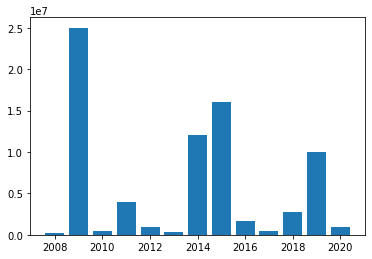

,Penalty
Year,
2008,1248000
2009,34953600
2010,32937750
2011,89631936
2012,129533742
2013,102300000
2014,131155000
2015,76238000
2016,99124500


In [126]:
import matplotlib.pyplot as plt

# by year
fines_by_year = allData.groupby('Year')[['Penalty']].sum()
plt.bar(allData["Year"], allData["Penalty"])
plt.show()
fines_by_year

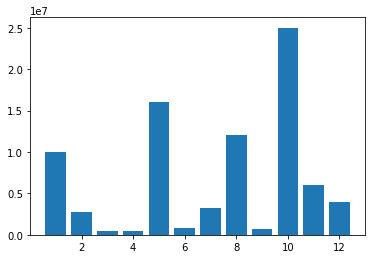

,Penalty
Month,
1,1287420900
2,102203000
3,36954646
4,40418550
5,73094332
6,38601850
7,61190100
8,147359450
9,58875300


In [127]:
# by month
fines_by_month = allData.groupby('Month')[['Penalty']].sum()
plt.bar(allData["Month"], allData["Penalty"])
plt.show()
fines_by_month

In [131]:
fines_by_entity

,Penalty
Regional_Entity,
Combo,1321816000
FRCC,40930900
MRO,10475500
NERC,2390000
NPCC,39974800
RF,293481698
SERC,138525500
SPP RE,27297086
Texas RE,23759648


In [135]:
fines_by_entity['Penalty']

Regional_Entity
Combo       1321816000
FRCC          40930900
MRO           10475500
NERC           2390000
NPCC          39974800
RF           293481698
SERC         138525500
SPP RE        27297086
Texas RE      23759648
WECC         231462596
Name: Penalty, dtype: int64

In [142]:
fines_by_entity.head(1)

Regional_Entity
Combo    1321816000
Name: Penalty, dtype: int64

In [144]:
fines_by_entity.iloc[1]

40930900

In [145]:
fines_by_entity.values

array([1321816000,   40930900,   10475500,    2390000,   39974800,
        293481698,  138525500,   27297086,   23759648,  231462596],
      dtype=int64)

In [146]:
fines_by_entity.attrs

AttributeError: 'Series' object has no attribute 'attrs'

In [155]:
allData.groupby('Regional_Entity').groups

{'Combo': Int64Index([ 240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
             ...
             5798, 5799, 5800, 5801, 5802, 5962, 5963, 5964, 5965, 5966],
            dtype='int64', length=302),
 'FRCC': Int64Index([ 222,  265,  266,  267,  268,  269,  270,  271,  272,  273,
             ...
             6896, 6897, 6898, 6899, 6900, 6901, 6902, 7393, 7452, 7453],
            dtype='int64', length=380),
 'MRO': Int64Index([ 162,  163,  289,  517,  549,  550,  579,  580,  581,  582,
             ...
             7454, 7455, 7456, 7497, 7498, 7499, 7554, 7564, 7565, 7579],
            dtype='int64', length=316),
 'NERC': Int64Index([ 433,  434,  435, 2819, 2820, 2821, 2822, 2823, 2824, 2845, 2846,
             3208, 3209, 3210, 3353, 3496, 3497, 4569, 4570, 4571, 4572, 4573,
             4574, 5000, 5001, 5002, 5003, 6286, 6287, 6288, 6289, 6290, 6291,
             6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301, 6302],
            dtype='int64'),
 'NPCC': In

In [156]:
g = allData.groupby('Regional_Entity').groups
type(g)

dict

In [157]:
g.keys()

dict_keys(['Combo', 'FRCC', 'MRO', 'NERC', 'NPCC', 'RF', 'SERC', 'SPP RE', 'Texas RE', 'WECC'])

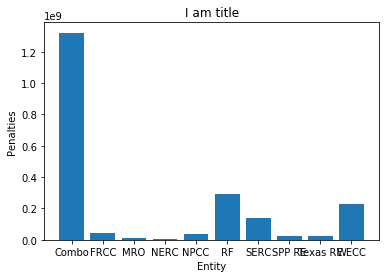

In [158]:

data = allData.groupby('Regional_Entity')['Penalty'].sum().values
labels = g.keys()
plt.xticks(range(len(data)), labels)
plt.xlabel('Entity')
plt.ylabel('Penalties')
plt.title('I am title')
plt.bar(range(len(data)), data) 
plt.show()

In [153]:
y = allData.groupby('Regional_Entity')['Penalty'].sum().values
labs

AttributeError: 'Series' object has no attribute 'groups'

In [138]:
fines_by_entity = allData.groupby('Regional_Entity')['Penalty'].sum()

In [149]:
fines_by_entity

Regional_Entity
Combo       1321816000
FRCC          40930900
MRO           10475500
NERC           2390000
NPCC          39974800
RF           293481698
SERC         138525500
SPP RE        27297086
Texas RE      23759648
WECC         231462596
Name: Penalty, dtype: int64

In [147]:
df = pd.DataFrame(fines_by_entity)

In [148]:
df.head(1)

,Penalty
Regional_Entity,
Combo,1321816000


In [152]:
df.columns

Index(['Penalty'], dtype='object')

In [141]:
type(fines_by_entity)

pandas.core.series.Series

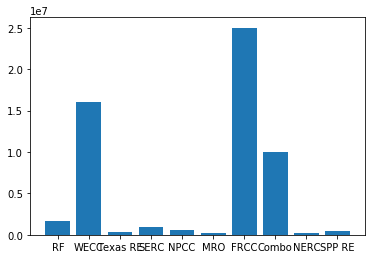

,Penalty
Regional_Entity,
Combo,1321816000
FRCC,40930900
MRO,10475500
NERC,2390000
NPCC,39974800
RF,293481698
SERC,138525500
SPP RE,27297086
Texas RE,23759648


In [130]:
# by entity
fines_by_entity = allData.groupby('Regional_Entity')[['Penalty']].sum()
plt.bar(allData["Regional_Entity"], allData["Penalty"])
plt.show()
fines_by_entity

# Current Questions and Thoughts on Modeling

Questions
* How to handle requirement? Just concerned with big part of requirement (i.e. just 3 of R3.1)? How high should these span to?
* What about the regional entities? My thinking so far:
  * SPP RE = Southwest Power Pool Regional Entity (https://www.spp.org/documents/21241/nerc%20registration%20process.pdf)
  * FRCC = Florida Reliability Coord Council (https://www.frcc.com/RC/SitePages/Home.aspx), change to SERC?
  * XXXX won't be able to do anything
  * What to do with multiple regions attached?
  * NCEA = NERC?
  * NERC as CEA = NERC?
* Concerns with breaking down by Registered Entity
* Just break down Reliability Standard by big view (i.e. PRC, CIP, BAL)?

Modeling
* Fines by year, Regional Entity, Reliability, Requirement
* Fines by month in a year

PRC-005


In [82]:
allData["Regional_Entity"].value_counts()
"""
WECC
RF
SERC
SPP RE
FRCC
NPCC
TRE
MRO
Unknown
Combo
NERC

XXXX --> Unknown
RF, SERC --> Combo
RF, Texas RE, SPP RE --> Combo
etc. for combos
NCEA --> NERC
RFC --> Unknown
"""


WECC                    2714
RF                      1508
SERC                    1052
SPP RE                   535
FRCC                     380
NPCC                     375
Texas RE                 374
MRO                      312
XXXX                     152
RF, SERC                  62
RF, Texas RE, SPP RE      36
SPP RE, RF                24
NCEA                      23
NERC as CEA               17
SPP RE, Texas RE          14
RF, MRO                    6
MRO, SPP                   5
NERC as CEA (NCEA)         4
MRO                        4
RF, SPP RE, Texas RE       2
RFC                        1
Name: Regional_Entity, dtype: int64

In [83]:
np.where(allData['Regional_Entity'] == "MRO ")

(array([ 162,  163, 6916, 6917], dtype=int64),)

In [11]:
allData["Risk_Factor"].unique()

array(['Medium', 'Lower', 'High', 'Medium ', 'Lower ',
       'Level One noncompliance', 'See FERC Order IN14-11-000',
       'See FERC Order IN14-10-000', 'See FERC Order IN14-9-000',
       'See FERC Order IN14-8-000', 'Pending',
       'See FERC Order IN14-7-000', 'See FERC Order IN14-6-000',
       ' Medium', nan, 'High\u200b', 'pending', 'Medium;\n',
       'Medium\u200b', 'Lower;', 'Lower\u200b', 'Lower\n', 'Lower/Medium',
       'Medium, Lower', 'Lower, Medium, Medium', 'Medium; Lower',
       'Lower; Lower; Medium; Medium', ' Lower ', 'Lower, Medium',
       'See FERC Order \nIN11-6-000',
       'Medium (NERC database states R2 Lower)',
       'Not applicable because the standard is regional',
       'See FERC Order \nIN11-7-000', 'See FERC Order \nIN11-1-000',
       'High/Medium', 'Lower/High', 'Medium/Lower',
       'See FERC Order \nIN08-5-000', 'None'], dtype=object)

In [12]:
allData["Risk_Assessment"].unique()

array(['Moderate', 'Minimal', 'Serious', nan, 'Minimal ', 'Serious '],
      dtype=object)

In [13]:
allData["Regional_Entity"].unique()

array(['RF', 'WECC', 'Texas RE', 'SERC', 'NPCC', 'MRO ', 'FRCC', 'XXXX',
       'MRO', 'RFC', 'NCEA', 'SPP RE', 'RF, SERC', 'RF, MRO',
       'RF, Texas RE, SPP RE', 'RF, SPP RE, Texas RE', 'SPP RE, RF',
       'NERC as CEA (NCEA) ', 'SPP RE, Texas RE', 'MRO, SPP',
       'NERC as CEA'], dtype=object)

In [14]:
allData["Regional_Entity"].value_counts()

WECC                    2714
RF                      1508
SERC                    1052
SPP RE                   535
FRCC                     380
NPCC                     375
Texas RE                 374
MRO                      312
XXXX                     152
RF, SERC                  62
RF, Texas RE, SPP RE      36
SPP RE, RF                24
NCEA                      23
NERC as CEA               17
SPP RE, Texas RE          14
RF, MRO                    6
MRO, SPP                   5
NERC as CEA (NCEA)         4
MRO                        4
RF, SPP RE, Texas RE       2
RFC                        1
Name: Regional_Entity, dtype: int64

In [15]:
np.where(allData['Regional_Entity'] == "XXXX")

(array([240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 292,
        293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
        306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
        358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370,
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
        384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
        397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
        410, 411, 412, 413, 414, 415, 416, 417, 418], dtype=int64),)

In [16]:
allData.iloc[244]

Date                                         5/30/2019
Regional_Entity                                   XXXX
Registered_Entity       Unidentified Registered Entity
Penalty                                        1000000
Reliability_Standard                         CIP-006-6
Requirement                                    R1. 1.3
Risk_Factor                                     Medium
Risk_Assessment                                Minimal
Month                                                5
Year                                              2019
Name: 244, dtype: object

In [17]:
allData["Requirement"].unique()

array(['R2', 'R1', 'R6', 'R3', 'R4', 'R5', 'R8', 'R1: P1.2',
       'R4; R4.1; R4.2; R4.3', 'R1; R1.1', 'R1; R1.1.2; R1.1.5',
       'R2; R2.1; R2.2; R2.3', 'R5: P5.1', 'R1; 1.1', 'R2.; 2.1',
       'R2; 2.1', 'R19', 'R1., R1.3', 'R2, R2.6',
       'R4; P4.2; \nSub-part 4.2.2', 'R2; P2.2', 'R;: P2.3', 'R2; P2.3',
       'R1; P1.5', 'R1; P1.1; P1.2; P1.3', 'R5; P5.1-P5.7', 'R2; P2.1',
       'R1; P1.1', 'R1, P1.1, P1.2',
       'R1; P1.4.1; P1.4.2; P1.4.3; P1.5.1; P1.5.2', 'R9', 'R13', 'R7',
       'R5.7', 'R1.1.1', 'R1., R1.1, 1.5,  1.2.4, 1.2.5, 1.6.2', 'R1.1',
       'R1; P1.1, 1.2, 1.3, and 1.4', 'R1.1; R1.2,', 'R2.1; R2.2', 'R1.3',
       'R1; P1.1.1, P1.1.2, P1.1.4, P1.1.5', 'R5; P5.5.1, P5.5.2',
       'R4; P4.2.2', 'R3; P3.1', 'R2; P2.1, 2.2, 2.3', 'R1; P1.3',
       'R2; P3', 'R3; 3.1', 'R1; 1.1., 1.2., 1.3', 'R2; 2.1., 2.2',
       'R5; P5.5', 'R2; P2', 'R3, 3.4', 'R4, 4.1', 'R1, 1.3', 'R1, 6.1',
       'R1. 1.3', 'R4. 4.1', 'R1, R1.6.1', 'R5, 5.2, 5.3, 5.7',
       'R2, 2.1, 

In [120]:
allData["Registered_Entity"].unique()

array(['Michigan Power LP', 'METC', 'Southern California Edison Company ',
       'sPower Services, LLC',
       'Sacramento Municipal Utility District (SMUD)',
       'Oncor Electric Delivery Company LLC (Oncor) ',
       'Twin Ridges Wind Farm', 'Associated Electric Cooperative, Inc.',
       'Unidentified Registered Entity',
       'Electric Transmission Texas, LLC', 'Ameren Services Company',
       'Ameren Missouri', 'Eversource Energy Service Company',
       'DTE Electric Company',
       'American Electric Power Service Corporation',
       'Portland General Electric Company ',
       'Exelon Generation Company, LLC - Exelon Nuclear',
       'Mississippi Delta Energy Agency',
       'Western Area Power Administration – Rocky Mountain Region',
       'Sierra Pacific Power Company', 'Nevada Power Company',
       'Public Service Company of New Mexico',
       'FirstLight Hydro Generating Company',
       'Bonneville Power Administration', 'Idaho Power Company',
       'City of Ni

In [64]:
allData["Reliability_Standard"].unique()

array(['VAR-002-4.1', 'FAC-008-1', 'FAC-003-3 ', 'FAC-003-3', 'VAR-002-4',
       'FAC-008-3', 'PRC-019-2', 'EOP-008-1', 'FAC-009-1', 'TOP-004-2',
       'PER-003-0', 'PER-005-1', 'CIP-005-5', 'CIP-007-6', 'CIP-011-2',
       'CIP-010-2', 'CIP-002-5.1', 'CIP-014-2', 'PRC-005-1 ',
       'PRC-005-1.1b', 'FAC-003-4', 'CIP-004-6', 'CIP-006-6',
       'CIP-007-3a', 'CIP-009-6', 'COM-002-4', 'VAR-002-2b', 'CIP-004-3a',
       'TOP-002-2.1b', 'PRC-005-2(i)', 'MOD-029-1a', 'MOD-029-2a',
       'CIP-005-3a', 'IRO-010-1a', 'IRO-005-3.1a', 'TOP-007-0',
       'TOP-001-3', 'TOP-001-4', 'PRC-005-1b ', 'IRO-001-4', 'EOP-006-2',
       'PRC-005-1b', 'CIP-007-6 ', 'VAR-002-4 ', 'INT-006-4', 'CIP-007-1',
       'CIP-006-3c', 'CIP-003-6', 'CIP-002-5.1a', 'MOD-025-2',
       'EOP-004-2', 'BAL-001-2', 'IRO-010-2', 'PRC-005-6', 'CIP-003-2',
       'PRC-001-1', 'CIP-008-3 ', 'CIP-003-3', 'CIP-005-1', 'CIP-009-6 ',
       'PRC-008-0', 'PRC-011-0', 'PRC-017-0', 'PER-005-1 ', 'BAL-001-1',
       'BAL-003-1.1'

In [19]:
allData["Reliability_Standard"].value_counts()

PRC-005-1                      839
CIP-007-1                      651
CIP-001-1                      401
CIP-005-1                      319
CIP-004-1                      307
CIP-007-3a                     268
CIP-006-1                      253
CIP-006-3c                     195
FAC-009-1                      178
FAC-008-1                      165
CIP-003-1                      151
CIP-005-3a                     138
TOP-002-2                      112
CIP-002-1                      112
EOP-005-1                      111
PRC-008-0                      110
VAR-002-1                      101
CIP-009-1                       97
CIP-007-6                       94
FAC-001-0                       92
PER-002-0                       89
CIP-007-3                       88
CIP-004-3                       85
FAC-003-1                       85
EOP-001-0                       76
CIP-010-2                       70
CIP-003-3                       65
PRC-001-1                       55
VAR-001-1           

In [118]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 10 columns):
Date                    7600 non-null object
Regional_Entity         7600 non-null object
Registered_Entity       7600 non-null object
Penalty                 7600 non-null int64
Reliability_Standard    7572 non-null object
Requirement             7572 non-null object
Risk_Factor             7507 non-null object
Risk_Assessment         3389 non-null object
Month                   7600 non-null int64
Year                    7600 non-null int64
dtypes: int64(3), object(7)
memory usage: 593.8+ KB


In [117]:
# let's see the correlation to the penalties
corr_matrix = allData.corr()
corr_matrix["Penalty"].sort_values(ascending=False)

Penalty    1.000000
Year       0.327911
Month     -0.202917
Name: Penalty, dtype: float64

# Charts

In [20]:
allData.head(1)

,Date,Regional_Entity,Registered_Entity,Penalty,Reliability_Standard,Requirement,Risk_Factor,Risk_Assessment,Month,Year
0,12/30/2020,RF,Michigan Power LP,0,VAR-002-4.1,R2,Medium,Moderate,12,2020


In [26]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 10 columns):
Date                    7600 non-null object
Regional_Entity         7600 non-null object
Registered_Entity       7600 non-null object
Penalty                 7600 non-null object
Reliability_Standard    7572 non-null object
Requirement             7572 non-null object
Risk_Factor             7507 non-null object
Risk_Assessment         3389 non-null object
Month                   7600 non-null int64
Year                    7600 non-null int64
dtypes: int64(2), object(8)
memory usage: 593.8+ KB


In [114]:
fines_by_year = allData.groupby('Year')[['Penalty']].sum()

In [115]:
fines_by_year

,Penalty
Year,
2008,1248000
2009,34953600
2010,32937750
2011,89631936
2012,129533742
2013,102300000
2014,131155000
2015,76238000
2016,99124500


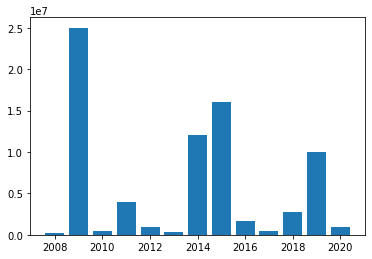

In [116]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.bar(allData["Year"], allData["Penalty"])
plt.show()

# Specific Year Stuff Below

# Read in the Files

In [24]:
import pandas as pd
import numpy as np

In [29]:
def readInData(startYear, endYear):
    eachYear = [] 
    for year in range(startYear, endYear + 1):
        fileName = "fines_" + str(year) + ".csv"
        data = pd.read_csv(fileName, error_bad_lines=False)
        eachYear.append(data)
    return eachYear

In [26]:
for i in range(1,1+1):
    print(i)

1


In [27]:
data = pd.read_csv("fines_2018.csv", error_bad_lines=False)

In [28]:
data.head(5)

,Region,Registered Entity Name,NCR,NERC Violation ID,Notice of Confirmed Violation or Settlement Agreement,Description of the Violation,Reliability Standard,Req.,Violation Risk Factor,Violation Severity Level,Risk Assessment,Violation Start Date,Violation End Date,Total Penalty or Sanction ($),Method of Discovery,Description of Mitigation Activity,Mitigation Completion Date,Date Regional Entity Verified Completion of Mitigation,"""Admits,"" ""Agrees/Stipulates,"" ""Neither Admits nor Denies,"" or ""Does Not Contest""","Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture"
0,ReliabilityFirst Corporation (ReliabilityFirst),"PJM Interconnection, LLC (PJM)",NCR00879,RFC2016015939,Settlement Agreement,"On July 15, 2016, PJM submitted a Self-Report ...",TOP-004-2,R2,High,Severe,This violation posed a moderate risk and did n...,"5/5/2016 At 17:14, when FirstEnergy believed i...","5/5/2016 At 18:54, when FirstEnergy properly a...","$34,000",Self-Report,"To mitigate this violation, FirstEnergy : \n\n...",10/19/2016,2/7/2017,Neither Admits nor Denies,ReliabilityFirst reviewed the entity’s and Fir...
1,Western Electricity Coordinating Council (WECC...,Bonneville Power Administration\n(BPA)\n\n,NCR05032\n,WECC2016016710\n\n\n\n\n\n\n\n\n\n\n\n,Settlement Agreement\n,"On December 23, 2016, BPA submitted a Self-Rep...",PRC-005-1.1b\n,R2.,High,Lower,This violation posed a minimal risk and did no...,3/1/2014 (when the Protection System maintenan...,3/28/2016 (when maintenance and testing were c...,No penalty,Self-Report\n,"To mitigate this violation, BPA: \n\n1) comple...",3/23/2017,4/20/2017,Does Not Contest\n\n,"On August 22, 2014, in Southwestern Power Admi..."
2,Western Electricity Coordinating Council (WECC...,Public Service Company of New Mexico (PNM),NCR05333,WECC2017016932,Settlement Agreement,"On February 6, 2017, PNM submitted a Self-Repo...",PRC-008-0,R2,Medium,Severe,This violation posed a minimal risk and did no...,6/18/2007 (when the Standard and Requirement b...,6/6/2017 (when the last of the UFLS devices in...,"$0 (for WECC2017016932, WECC201701933, and WEC...",Self-Report,"To mitigate this violation, PNM:\n\n1) perform...",6/15/2017,1/31/2018,Admits,WECC reviewed PNM's internal compliance progra...
3,Western Electricity Coordinating Council (WECC...,Public Service Company of New Mexico (PNM),NCR05333,WECC2017016933,Settlement Agreement,"On February 6, 2017, PNM submitted a Self-Repo...",PRC-011-0,R1; R1.6,Medium,Lower,This violation posed a minimal risk and did no...,6/18/2007 (when the Standard and Requirement b...,5/1/2017 (Mitigation Plan completion),"$0 (for WECC2017016932, WECC201701933, and WEC...",Self-Report,"To mitigate this violation, PNM:\n\n1) perform...",5/1/2017,1/31/2018,Admits,WECC reviewed PNM's internal compliance progra...
4,Western Electricity Coordinating Council (WECC...,Public Service Company of New Mexico (PNM),NCR05333,WECC2017016934,Settlement Agreement,"On February 6, 2017, PNM submitted a Self-Repo...",PRC-017-0,R1,High,Lower,This violation posed a minimal risk and did no...,6/18/2007 (when the Standard and Requirement b...,"5/24/2017 (when PNM recorded either the last, ...","$0 (for WECC2017016932, WECC201701933, and WEC...",Self-Report,"To mitigate this violation, PNM:\n\n1) perform...",3/31/2017,1/31/2018,Admits,WECC reviewed PNM's internal compliance progra...


In [43]:
allYears = readInData(2018, 2018)
allYears[0].head(1)

,Region,Registered Entity Name,NCR,NERC Violation ID,Notice of Confirmed Violation or Settlement Agreement,Description of the Violation,Reliability Standard,Req.,Violation Risk Factor,Violation Severity Level,Risk Assessment,Violation Start Date,Violation End Date,Total Penalty or Sanction ($),Method of Discovery,Description of Mitigation Activity,Mitigation Completion Date,Date Regional Entity Verified Completion of Mitigation,"""Admits,"" ""Agrees/Stipulates,"" ""Neither Admits nor Denies,"" or ""Does Not Contest""","Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture"
0,ReliabilityFirst Corporation (ReliabilityFirst),"PJM Interconnection, LLC (PJM)",NCR00879,RFC2016015939,Settlement Agreement,"On July 15, 2016, PJM submitted a Self-Report ...",TOP-004-2,R2,High,Severe,This violation posed a moderate risk and did n...,"5/5/2016 At 17:14, when FirstEnergy believed i...","5/5/2016 At 18:54, when FirstEnergy properly a...","$34,000",Self-Report,"To mitigate this violation, FirstEnergy : \n\n...",10/19/2016,2/7/2017,Neither Admits nor Denies,ReliabilityFirst reviewed the entity’s and Fir...


In [32]:
data.head(1)

,Region,Registered Entity Name,NCR,NERC Violation ID,Notice of Confirmed Violation or Settlement Agreement,Description of the Violation,Reliability Standard,Req.,Violation Risk Factor,Violation Severity Level,Risk Assessment,Violation Start Date,Violation End Date,Total Penalty or Sanction ($),Method of Discovery,Description of Mitigation Activity,Mitigation Completion Date,Date Regional Entity Verified Completion of Mitigation,"""Admits,"" ""Agrees/Stipulates,"" ""Neither Admits nor Denies,"" or ""Does Not Contest""","Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture"
0,ReliabilityFirst Corporation (ReliabilityFirst),"PJM Interconnection, LLC (PJM)",NCR00879,RFC2016015939,Settlement Agreement,"On July 15, 2016, PJM submitted a Self-Report ...",TOP-004-2,R2,High,Severe,This violation posed a moderate risk and did n...,"5/5/2016 At 17:14, when FirstEnergy believed i...","5/5/2016 At 18:54, when FirstEnergy properly a...","$34,000",Self-Report,"To mitigate this violation, FirstEnergy : \n\n...",10/19/2016,2/7/2017,Neither Admits nor Denies,ReliabilityFirst reviewed the entity’s and Fir...


In [33]:
data.drop(['NCR'], axis = 1)

,Region,Registered Entity Name,NERC Violation ID,Notice of Confirmed Violation or Settlement Agreement,Description of the Violation,Reliability Standard,Req.,Violation Risk Factor,Violation Severity Level,Risk Assessment,Violation Start Date,Violation End Date,Total Penalty or Sanction ($),Method of Discovery,Description of Mitigation Activity,Mitigation Completion Date,Date Regional Entity Verified Completion of Mitigation,"""Admits,"" ""Agrees/Stipulates,"" ""Neither Admits nor Denies,"" or ""Does Not Contest""","Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture"
0,ReliabilityFirst Corporation (ReliabilityFirst),"PJM Interconnection, LLC (PJM)",RFC2016015939,Settlement Agreement,"On July 15, 2016, PJM submitted a Self-Report ...",TOP-004-2,R2,High,Severe,This violation posed a moderate risk and did n...,"5/5/2016 At 17:14, when FirstEnergy believed i...","5/5/2016 At 18:54, when FirstEnergy properly a...","$34,000",Self-Report,"To mitigate this violation, FirstEnergy : \n\n...",10/19/2016,2/7/2017,Neither Admits nor Denies,ReliabilityFirst reviewed the entity’s and Fir...
1,Western Electricity Coordinating Council (WECC...,Bonneville Power Administration\n(BPA)\n\n,WECC2016016710\n\n\n\n\n\n\n\n\n\n\n\n,Settlement Agreement\n,"On December 23, 2016, BPA submitted a Self-Rep...",PRC-005-1.1b\n,R2.,High,Lower,This violation posed a minimal risk and did no...,3/1/2014 (when the Protection System maintenan...,3/28/2016 (when maintenance and testing were c...,No penalty,Self-Report\n,"To mitigate this violation, BPA: \n\n1) comple...",3/23/2017,4/20/2017,Does Not Contest\n\n,"On August 22, 2014, in Southwestern Power Admi..."
2,Western Electricity Coordinating Council (WECC...,Public Service Company of New Mexico (PNM),WECC2017016932,Settlement Agreement,"On February 6, 2017, PNM submitted a Self-Repo...",PRC-008-0,R2,Medium,Severe,This violation posed a minimal risk and did no...,6/18/2007 (when the Standard and Requirement b...,6/6/2017 (when the last of the UFLS devices in...,"$0 (for WECC2017016932, WECC201701933, and WEC...",Self-Report,"To mitigate this violation, PNM:\n\n1) perform...",6/15/2017,1/31/2018,Admits,WECC reviewed PNM's internal compliance progra...
3,Western Electricity Coordinating Council (WECC...,Public Service Company of New Mexico (PNM),WECC2017016933,Settlement Agreement,"On February 6, 2017, PNM submitted a Self-Repo...",PRC-011-0,R1; R1.6,Medium,Lower,This violation posed a minimal risk and did no...,6/18/2007 (when the Standard and Requirement b...,5/1/2017 (Mitigation Plan completion),"$0 (for WECC2017016932, WECC201701933, and WEC...",Self-Report,"To mitigate this violation, PNM:\n\n1) perform...",5/1/2017,1/31/2018,Admits,WECC reviewed PNM's internal compliance progra...
4,Western Electricity Coordinating Council (WECC...,Public Service Company of New Mexico (PNM),WECC2017016934,Settlement Agreement,"On February 6, 2017, PNM submitted a Self-Repo...",PRC-017-0,R1,High,Lower,This violation posed a minimal risk and did no...,6/18/2007 (when the Standard and Requirement b...,"5/24/2017 (when PNM recorded either the last, ...","$0 (for WECC2017016932, WECC201701933, and WEC...",Self-Report,"To mitigate this violation, PNM:\n\n1) perform...",3/31/2017,1/31/2018,Admits,WECC reviewed PNM's internal compliance progra...
5,Western Electricity Coordinating Council (WECC...,Bonneville Power Administration (BPA),WECC2013013078,Settlement Agreement\n\n,During a Compliance Audit conducted from Octob...,PER-005-1,R1; R1.1,Medium,Severe,This violation posed a moderate risk and did n...,4/1/2013 (when PER-005-1 became effective),6/7/2017 (Mitigation Plan completion),"No penalty (for WECC2013013078, WECC2013013079...",Compliance Audit,"To mitigate this violation, BPA:\n\n1) used it...",6/7/2017,11/22/2017,Does Not Contest,WECC reviewed BPA's internal compliance progra...
6,Western Electricity Coordinating Council (WECC...,Bonneville Pow

In [34]:
data.head(1)

,Region,Registered Entity Name,NCR,NERC Violation ID,Notice of Confirmed Violation or Settlement Agreement,Description of the Violation,Reliability Standard,Req.,Violation Risk Factor,Violation Severity Level,Risk Assessment,Violation Start Date,Violation End Date,Total Penalty or Sanction ($),Method of Discovery,Description of Mitigation Activity,Mitigation Completion Date,Date Regional Entity Verified Completion of Mitigation,"""Admits,"" ""Agrees/Stipulates,"" ""Neither Admits nor Denies,"" or ""Does Not Contest""","Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture"
0,ReliabilityFirst Corporation (ReliabilityFirst),"PJM Interconnection, LLC (PJM)",NCR00879,RFC2016015939,Settlement Agreement,"On July 15, 2016, PJM submitted a Self-Report ...",TOP-004-2,R2,High,Severe,This violation posed a moderate risk and did n...,"5/5/2016 At 17:14, when FirstEnergy believed i...","5/5/2016 At 18:54, when FirstEnergy properly a...","$34,000",Self-Report,"To mitigate this violation, FirstEnergy : \n\n...",10/19/2016,2/7/2017,Neither Admits nor Denies,ReliabilityFirst reviewed the entity’s and Fir...


In [75]:
allData = pd.read_csv("all_fines_2008_to_2020.csv", error_bad_lines=False)

In [76]:
allData.head(5)

,Filing Date,Docket Number,Regional Entity,Registered Entity,NCR ID (NERC Compliance Registry Identifier),Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.),NERC Violation ID,Reliability Standard,Req.,"Violation Risk Factor (Lower, Medium, High)","Risk Assessment (Minimal, Moderate, Serious)",Mitigation Completion Date,Notice of No Further Review Issued
0,12/30/2020,NP21-5-000,RF,Michigan Power LP,NCR11409,0,RFC2019021748,VAR-002-4.1,R2,Medium,Moderate,43473,NaN
1,12/30/2020,NP21-5-000,RF,METC,NCR00820,125000,RFC2017017946,FAC-008-1,R1,Lower,Moderate,44561,NaN
2,11/30/2020,NP21-4-000,WECC,Southern California Edison Company,NCR05398,296000,WECC2017018527,FAC-003-3,R2,High,Moderate,43686,X
3,11/30/2020,NP21-4-000,WECC,Southern California Edison Company,NCR05398,296000,WECC2018020303,FAC-003-3,R6,Medium,Moderate,43921,X
4,11/30/2020,NP21-2-000,WECC,"sPower Services, LLC",NCR11679,22000,WECC2017017218,VAR-002-4,R3,Medium,Minimal,42795,X


# Clean up the Data

Right now just looking at region, registered entity name, reliability standard, req, and penalty...

In [37]:
data.columns

Index(['Region', 'Registered Entity Name', 'NCR', 'NERC Violation ID',
       'Notice of Confirmed Violation or Settlement Agreement',
       'Description of the Violation', 'Reliability Standard', 'Req.',
       'Violation Risk Factor', 'Violation Severity Level', 'Risk Assessment',
       'Violation Start Date', 'Violation End Date',
       'Total Penalty or Sanction ($)', 'Method of Discovery',
       'Description of Mitigation Activity', 'Mitigation  Completion Date',
       'Date Regional Entity Verified Completion of Mitigation ',
       '"Admits," "Agrees/Stipulates," "Neither Admits nor Denies," or "Does Not Contest"',
       'Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture'],
      dtype='object')

In [77]:
allData.columns

Index(['Filing Date', 'Docket Number', 'Regional Entity', 'Registered Entity',
       'NCR ID (NERC Compliance Registry Identifier)',
       'Total Penalty ($) (The total penalty amount represents an aggregate amount for the filing; it does not represent an amount per violation.)',
       'NERC Violation ID', 'Reliability Standard', 'Req.',
       'Violation Risk Factor (Lower, Medium, High)',
       'Risk Assessment (Minimal, Moderate, Serious)',
       'Mitigation Completion Date', 'Notice of No Further Review Issued'],
      dtype='object')

In [41]:
def dropCols(allYears):
    colsToDrop = ['NCR', 'NERC Violation ID',
       'Notice of Confirmed Violation or Settlement Agreement',
       'Description of the Violation','Violation Risk Factor', 'Violation Severity Level', 'Risk Assessment',
       'Violation Start Date', 'Violation End Date','Method of Discovery',
       'Description of Mitigation Activity', 'Mitigation  Completion Date',
       'Date Regional Entity Verified Completion of Mitigation ',
       '"Admits," "Agrees/Stipulates," "Neither Admits nor Denies," or "Does Not Contest"',
       'Other Factors Affecting the Penalty Determination, including Compliance History, Internal Compliance Program and Compliance Culture']
    newAllYears = []
    for year in allYears:
        for colName in colsToDrop:
            year = year.drop([colName], axis = 1)
        newAllYears.append(year)
    return newAllYears
        

In [58]:
def cleanUpRegions(allYears):
    newAllYears = []
    for year in allYears:
        for i in range(len(year)):
            # rename region name
            currRow = year.iloc[i]
            if "ReliabilityFirst" in currRow['Region'] or "RF" in currRow['Region']:
                year.at[i,'Region']='RF'
            elif "Western" in currRow['Region'] or "WECC" in currRow['Region']:
                year.at[i,'Region']='WECC'
            elif "Texas" in currRow['Region'] or "TRE" in currRow['Region']:
                year.at[i,'Region']='TRE'
            elif "Southeast" in currRow['Region'] or "SERC" in currRow['Region']:
                # check this one if southeast is correct
                year.at[i,'Region']='SERC'
            elif "Midwest" in currRow['Region'] or "MRO" in currRow['Region']:
                year.at[i,'Region']='MRO'
            elif "Northeast" in currRow['Region'] or "NPCC" in currRow['Region']:
                year.at[i,'Region']='NPCC'
            else:
                print(currRow['Region']) # see what else it fits in 
            
        newAllYears.append(year)
                
    return newAllYears

In [73]:
def cleanUpPenalty(allYears):
    newAllYears = []
    for year in allYears:
        for i in range(len(year)):
            currRow = year.iloc[i]
            penalty = currRow["Total Penalty or Sanction ($)"]
            if "No penalty" in penalty:
                # no penalty, set to 0
                year.at[i,"Total Penalty or Sanction ($)"]=0
            else:
                # will need to clean this up
                # take account if no dollar sign or space is found
                print(penalty)
                dollarSignIndex = penalty.find("$")
                spaceAfterDollarIndex = penalty.find(" ", dollarSignIndex)
                dollarAmount = penalty[dollarSignIndex+1:spaceAfterDollarIndex]
                dollarAmount = dollarAmount.replace(",","")
                year.at[i,"Total Penalty or Sanction ($)"]=int(dollarAmount)
        
        newAllYears.append(year)
                
    return newAllYears     
                
            

In [65]:
a = "ab12bsh3"
print(a.find("b", -1))

-1


In [44]:
allYears = dropCols(allYears)

In [59]:
allYears = cleanUpRegions(allYears)

Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
The North American Electric Reliability Corporation (NERC) as Compliance Enforcement Authority (CEA)
The North American Electric Reliability Corporation (NERC) as Compliance Enforcement Authority (CEA)
The North American Electric Reliability Corporation (NERC) as Compliance Enforcement Authority (CEA)
SPP RE
Southwest Power Pool Regional Entity (SPP RE)



Southwest Power Pool Regional Entity (SPP RE)



Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, Inc. 
(FRCC)
Florida Reliability Coordinating Council, 

In [74]:
t = allYears
t = cleanUpPenalty(t)
t[0].head(5)

TypeError: argument of type 'int' is not iterable

In [60]:
allYears[0].head(1)

,Region,Registered Entity Name,Reliability Standard,Req.,Total Penalty or Sanction ($)
0,RF,"PJM Interconnection, LLC (PJM)",TOP-004-2,R2,"$34,000"


In [52]:
len(allYears[0])

97

In [50]:
firstRow = allYears[0].iloc[0]

In [51]:
firstRow

Region                           ReliabilityFirst Corporation (ReliabilityFirst)
Registered Entity Name                            PJM Interconnection, LLC (PJM)
Reliability Standard                                                   TOP-004-2
Req.                                                                          R2
Total Penalty or Sanction ($)                                           $34,000 
Name: 0, dtype: object

# Visualize the Data

Ideas: breakdown by most fines by regional entity, most fines for entity, most fines by part, also just in general for them, r1 stuff

### For Each Year

In [ ]:
# breakdown

In [61]:
temp = allYears[0]

In [62]:
temp["Region"].unique()

array(['RF', 'WECC', 'NPCC',
       'Florida Reliability Coordinating Council, Inc. \n(FRCC)',
       'The North American Electric Reliability Corporation (NERC) as Compliance Enforcement Authority (CEA)',
       'TRE', 'SPP RE', 'SERC',
       'Southwest Power Pool Regional Entity (SPP RE)\n\n\n', 'MRO'],
      dtype=object)

In [63]:
temp["Total Penalty or Sanction ($)"].unique()

array(['$34,000 ', 'No penalty ',
       '$0 (for WECC2017016932, WECC201701933, and WECC2017016934)',
       'No penalty (for WECC2013013078, WECC2013013079, and WECC2013013090)',
       '$0 ',
       '$22,000\n(for FRCC2017016812,\nFRCC2016015952,\nFRCC2017018469,\nFRCC2017017318, and \nFRCC2017017317)',
       '$0 (for NCEA201717867, NCEA201717868, and NCEA201717866) ',
       '$225,000 ', '$110,000 ', '0', 'No penalty', 'No Penalty',
       '$200,000 ', '$100,000 ',
       '$0 (for RFC2016015884, RFC2016015885, RFC2016015886, RFC2016015887, RFC2016015888, RFC2015014723. RFC2016015930, RFC2016015932, RFC2016015933, RFC2016015834, RFC2015015328, RFC2015014717, RFC2015014718, RFC2015014720, RFC2015014738, RFC2015015071, RFC2015014719, RFC2015014722, RFC2015015311, RFC2017016756, and RFC2017016759)',
       '$27,000 (for SPP2016015824 and SPP2016015826)\n', '$180,000 ',
       '$144,000 ', '$120,000 ', '$300,000 ',
       '$60,000 ((for FRCC2017017140, FRCC2017017139, FRCC2017017106, F

# Conclusion

In [1]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("temp2.csv", error_bad_lines=False)

In [11]:
data.head(5)

,Filing Date,NOC ID,Region,Registered Entity Name,NCR,Reliability Functions,Notice of Confirmed Violation or Settlement Agreement,Admits OR Agrees and Stipulates OR Neither Admits nor Denies OR Does Not Contest,Total Penalty or Sanction ($),NERC Violation ID,...,Method of Discovery,Discovery Date,Violation Start Date,Violation End Date,Mitigation Completion Date,Date Regional Entity Verified Completion of Mitigation,Description of Noncompliance,Description of the Risk Assessment,Description and Status of Mitigation Activity,Other Factors Affecting the Penalty Determination which includes Compliance History and Internal Compliance Program and Compliance Culture
0,44439,NOC-2724,Western Electricity Coordinating Council (WECC),Farmington Electric Utility System (FEUS),NCR05155,GO,Settlement Agreement \n\n \n\n,Admits,"$49,000 (for WECC2020023450 and WECC2020023451)",WECC2020023450,...,Self-Report\n,43972,42552,44127,44127,TBD,"On May 21, 2020, FEUS submitted a Self-Report ...",This violation posed a moderate risk and did n...,"To mitigate this violation, FEUS has: \n1) con...",WECC did not apply mitigating credit for FEUS’...
1,44439,NOC-2724,Western Electricity Coordinating Council (WECC),Farmington Electric Utility System (FEUS),NCR05155,GO,Settlement Agreement \n\n \n\n,Admits,"$49,000 (for WECC2020023450 and WECC2020023451)",WECC2020023451,...,Self-Report\n,43972,42552,44127,44127,TBD,"On May 21, 2020, FEUS submitted a Self-Report ...",This violation posed a moderate risk and did n...,"To mitigate this violation, FEUS has: \n1) con...",WECC did not apply mitigating credit for FEUS’...
2,44439,NOC-2727,Western Electricity Coordinating Council (WECC),US Bureau of Reclamation (USBR)\n,NCR05441,GOP,Settlement Agreement\n,Admits,"No Penalty (for WECC2018020569, WECC2018020042...",WECC2018020569,...,Self-Report\n,43392,43175,43245,43255,43580,USBR submitted a Self-Report stating it was in...,This violation posed a minimal risk and did no...,"To mitigate this violation, USBR has or will p...","On August 22, 2014, in Southwestern Power Admi..."
3,44439,NOC-2727,Western Electricity Coordinating Council (WECC),US Bureau of Reclamation (USBR)\n,NCR05441,"GO, TO",Settlement Agreement\n,Admits,"No Penalty (for WECC2018020569, WECC2018020042...",WECC2018020042,...,Self-Report\n,43299,42095,42511,43376,43502,USBR submitted Self-Report stating it was in p...,This violation posed a moderate risk and did n...,"To mitigate this violation, USBR has or will p...","On August 22, 2014, in Southwestern Power Admi..."
4,44439,NOC-2727,Western Electricity Coordinating Council (WECC),US Bureau of Reclamation (USBR)\n,NCR05441,"GO, TO",Settlement Agreement\n,Admits,"No Penalty (for WECC2018020569, WECC2018020042...",WECC2019022404,...,Self-Report\n,43756,41730,43340,43628,44257,USBR submitted Self-Report stating it was in p...,This violation posed a moderate risk and did n...,"To mitigate this violation, USBR has or will p...","On August 22, 2014, in Southwestern Power Admi..."


In [14]:
t = np.where(data["Reliability Standard"].str.contains("PRC"))

In [23]:
data["Reliability Standard"].unique()

array(['PRC-019-2 ', 'PRC-024-2', 'PRC-001-1.1(ii) ', 'PRC-005-1.1b ',
       'COM-002-4 '], dtype=object)

In [15]:
t

(array([0, 1, 2, 3, 4], dtype=int64),)

In [21]:
display(data.iloc[0])

Filing Date                                                                                                                                                                               44439
NOC ID                                                                                                                                                                                 NOC-2724
Region                                                                                                                                         Western Electricity Coordinating Council (WECC) 
Registered Entity Name                                                                                                                                Farmington Electric Utility System (FEUS)
NCR                                                                                                                                                                                    NCR05155
Reliability Functions                   

In [22]:
data.iloc[0]

Filing Date                                                                                                                                                                               44439
NOC ID                                                                                                                                                                                 NOC-2724
Region                                                                                                                                         Western Electricity Coordinating Council (WECC) 
Registered Entity Name                                                                                                                                Farmington Electric Utility System (FEUS)
NCR                                                                                                                                                                                    NCR05155
Reliability Functions                   

# Blank

In [133]:
A = np.matrix([[0,0,0,0,21.78,28.28],[0.01,0,0,0,0,0], [0,0.21,0.33,0,0.02,0],
               [0,0,0.33,0.71,0.04,0],[0,0,0,0.14,0.77,0.22],[0,0,0,0,0.04,0.26]])
x = np.matrix('800 ; 90 ; 56 ; 23 ; 31 ; 11') 

In [132]:
A

matrix([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.178e+01,
         2.828e+01],
        [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 2.100e-01, 3.300e-01, 0.000e+00, 2.000e-02,
         0.000e+00],
        [0.000e+00, 0.000e+00, 3.300e-01, 7.100e-01, 4.000e-02,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.400e-01, 7.700e-01,
         2.200e-01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e-02,
         2.600e-01]])

In [134]:
x

matrix([[800],
        [ 90],
        [ 56],
        [ 23],
        [ 31],
        [ 11]])

In [135]:
np.dot(A, x)

matrix([[986.26],
        [  8.  ],
        [ 38.  ],
        [ 36.05],
        [ 29.51],
        [  4.1 ]])

In [136]:
B = np.matrix([[0,0,113.9],[0.0135,0,0], [0,0.65,0]])
B

matrix([[0.000e+00, 0.000e+00, 1.139e+02],
        [1.350e-02, 0.000e+00, 0.000e+00],
        [0.000e+00, 6.500e-01, 0.000e+00]])

In [139]:
np.linalg.matrix_power(B,5)

matrix([[0.00000000e+00, 7.39959465e+01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.53683889e+00],
        [8.77037119e-03, 0.00000000e+00, 0.00000000e+00]])